In [1]:
'''
PROBLEM DESC
https://www.statcrunch.com/5.0/viewreport.php?reportid=35115#Result4
'''
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn 

from mpl_toolkits.mplot3d import axes3d
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
%matplotlib inline

c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# data file dir's

hf_dir = "C:\\Users\\vinayak tyagi\\Downloads\\height-foot.csv"
wh_dir = "C:\\Users\\vinayak tyagi\\Downloads\\weight-height.csv"
whf_dir = "C:\\Users\\vinayak tyagi\\Downloads\\weight-height-foot.csv"

# Now reading the hf_file
hf_data = pd.read_csv(hf_dir)
hf_data.head()

,height,foot
0,68.0,12.0
1,66.0,9.0
2,75.0,12.0
3,71.0,11.0
4,67.0,12.0


In [3]:
# Now reading the wh_file
wh_data = pd.read_csv(wh_dir)
wh_data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


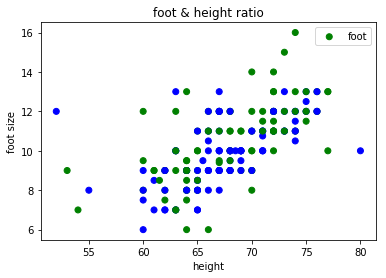

In [4]:
# Now visulization of data
height_hf_data = hf_data['height']
foot_hf_data = hf_data['foot']

plt.scatter(height_hf_data, foot_hf_data,c=['green','blue'], cmap = plt.cm.coolwarm)
plt.ylabel("foot size")
plt.xlabel("height")
plt.title("foot & height ratio")
plt.legend()
plt.show()

In [5]:
# making the dataset
train_x ,test_x , train_y, test_y = train_test_split(height_hf_data , foot_hf_data , test_size = 0.1)

print(train_x); print(train_y)

40     61.0
39     74.0
167    67.0
156    61.0
6      67.0
93     61.0
127    62.0
14     65.0
157    68.5
69     71.0
84     66.0
44     65.0
60     64.0
158    69.0
81     74.0
108    72.0
110    75.0
190    73.0
189    70.0
37     68.0
146    63.0
124    69.0
168    70.0
29     69.0
62     73.0
182    60.0
154    63.0
135    66.0
126    73.0
172    64.0
       ... 
66     64.0
30     65.0
12     69.0
68     70.0
144    67.0
198    70.0
103    62.0
53     63.0
67     71.0
24     68.0
80     63.0
74     75.0
109    67.0
75     60.0
47     66.0
186    61.5
112    72.0
137    71.0
159    65.0
128    74.0
117    69.0
115    68.0
43     72.0
7      75.0
50     70.0
132    65.0
191    65.5
55     68.0
107    68.0
49     67.0
Name: height, Length: 179, dtype: float64
40      9.00
39     12.00
167     8.00
156     9.00
6       9.00
93      8.50
127     7.00
14     10.00
157    10.00
69     11.00
84     12.00
44      8.00
60      9.00
158    11.00
81     11.50
108    11.00
110    11.50
190  

In [6]:
# linear model
l = LinearRegression()

In [7]:
# Since our model need two dimestion data so modefing it

train_x = np.array(train_x).reshape(-1,1)
test_x = np.array(test_x).reshape(-1,1)

In [8]:
a = l.fit(train_x , train_y)
print(a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [9]:
b = l.score(test_x , test_y)
print(b)

0.36906389828875563


Text(0.5,1,'foot & height ratio')

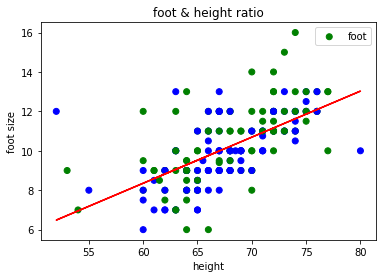

In [10]:
plt.scatter(height_hf_data, foot_hf_data, c=['green','blue'] , cmap=plt.cm.coolwarm)
m ,b = np.polyfit(height_hf_data, foot_hf_data ,1)
plt.plot(train_x,m*train_x+b , 'r')
plt.legend()
plt.ylabel("foot size")
plt.xlabel("height")
plt.title("foot & height ratio")

In [11]:
# Now , perdicting the value of foot for our wh data set
height = np.array(wh_data["Height"]).reshape(-1,1)

predict_foot = l.predict(height)
print(predict_foot)

[11.5465017  10.39183961 11.60647631 ...  9.27164591 10.44936378
  8.83310151]


In [12]:
wh_data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
# now making the new csv for all foot-weight-height-gender

df = pd.DataFrame(data = {"Gender": wh_data["Gender"],
                         "Height": wh_data["Height"],
                         "Weight": wh_data["Weight"],
                         "Foot": predict_foot })
df.to_csv(whf_dir, sep = ",", index = False)

In [14]:
# Now reading the file 

data = pd.read_csv(whf_dir)
data.head()

,Gender,Height,Weight,Foot
0,Male,73.847017,241.893563,11.546502
1,Male,68.781904,162.310473,10.391840
2,Male,74.110105,212.740856,11.606476
3,Male,71.730978,220.042470,11.064122
4,Male,69.881796,206.349801,10.642575


No handles with labels found to put in legend.


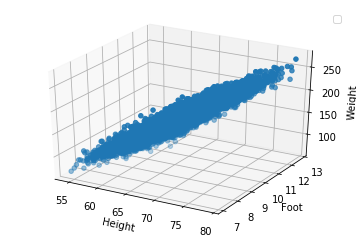

In [15]:
# Now Visulization of data in 3d

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
rs = np.array(data["Weight"])
z = rs.reshape(-1,1)

ax1.scatter(data["Height"], data["Foot"], z)

ax1.set_xlabel("Height")
ax1.set_ylabel("Foot")
ax1.set_zlabel("Weight")
ax1.legend()

Text(0.5,1,'Height & Weight Graph')

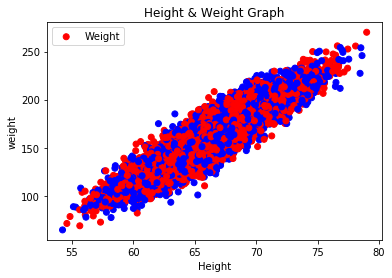

In [16]:
# Now Visulizing the data set of Height and Weight
plt.scatter(data["Height"], data["Weight"], c=['red','blue'] , cmap=plt.cm.coolwarm )
plt.legend()
plt.xlabel("Height")
plt.ylabel("weight")
plt.title("Height & Weight Graph")

Text(0.5,1,'Height & foot Graph')

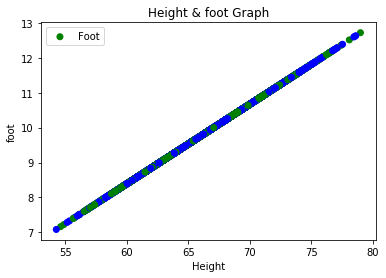

In [17]:
plt.scatter(data["Height"], data["Foot"], c=['green','blue'])
plt.legend()
plt.xlabel("Height")
plt.ylabel("foot")
plt.title("Height & foot Graph")

In [18]:
gender = data["Gender"]

In [19]:
data.drop("Gender", axis=1 , inplace=True)


In [20]:
data.head()

,Height,Weight,Foot
0,73.847017,241.893563,11.546502
1,68.781904,162.310473,10.391840
2,74.110105,212.740856,11.606476
3,71.730978,220.042470,11.064122
4,69.881796,206.349801,10.642575


In [21]:
train_x , test_x , train_y , test_y = train_test_split(data, gender , test_size = 0.3) 

In [22]:
print(train_x); print(train_y)

         Height      Weight       Foot
4276  68.271050  172.941248  10.275383
1277  72.385301  189.165592  11.213283
1093  69.207100  172.775163  10.488769
7942  63.530648  131.418934   9.194744
9300  62.883526  149.606555   9.047223
1884  73.049595  218.711327  11.364718
8679  69.190436  172.235966  10.484970
2557  69.050638  191.522275  10.453101
4476  69.893269  196.075637  10.645190
7454  64.853489  147.527955   9.496303
8039  62.719589  121.811621   9.009852
5257  61.124727  117.388949   8.646281
6151  63.942624  125.194118   9.288659
6148  64.842595  142.879180   9.493820
7001  61.926250  113.648007   8.828999
2573  69.895624  200.120361  10.645727
1490  68.955280  207.744486  10.431363
5435  61.456262  117.028717   8.721859
6806  66.650540  158.221301   9.905966
5560  61.991561  129.321530   8.843888
131   65.806248  165.850648   9.713498
8736  70.950659  193.225927  10.886237
3333  63.873409  152.554620   9.272881
9971  64.640247  155.318297   9.447692
9345  67.771515  149.6193

In [23]:
# Now making the model of Decsion tree classifier

model = DecisionTreeClassifier()

In [24]:
model.fit(train_x , train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
model.score(test_x, test_y)

0.8733333333333333

In [26]:
predict_y = model.predict(test_x)

In [27]:
print(test_y); print(predict_y)

2127      Male
3012      Male
88        Male
5485    Female
4938      Male
6489    Female
3270      Male
3451      Male
7493    Female
4680      Male
7755    Female
7307    Female
8093    Female
2632      Male
1938      Male
3006      Male
8972    Female
850       Male
282       Male
7159    Female
247       Male
5288    Female
694       Male
2394      Male
8002    Female
4148      Male
7301    Female
4513      Male
4602      Male
2848      Male
         ...  
4686      Male
4949      Male
8582    Female
3570      Male
4746      Male
845       Male
6685    Female
3764      Male
2545      Male
9946    Female
1307      Male
3812      Male
5987    Female
9628    Female
1975      Male
5990    Female
906       Male
9560    Female
93        Male
8050    Female
2941      Male
3889      Male
5282    Female
1697      Male
7721    Female
7904    Female
857       Male
4426      Male
5520    Female
6416    Female
Name: Gender, Length: 3000, dtype: object
['Male' 'Male' 'Female' ... 'Male' 'Female'

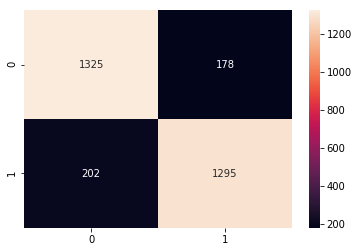

In [28]:
sns.heatmap(sklearn.metrics.confusion_matrix(test_y, predict_y),annot=True, fmt = '.5g')